In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
import gc
sys.path.append("../../../code/utils/")
import data_utils as du
import perf_utils as pu
from contextlib import contextmanager

In [2]:
cooc_folder = "../../../data/nlp_cooccurrence/preliminary_contest_data/byUserFeatureName/"


def load_cooc(feat_name):
    cooc_file = "userFeature.[featureName='{}'].pkl".format(feat_name)
    cooc_path = os.path.join(cooc_folder, cooc_file)
    return du.load_pickle(cooc_path)

In [3]:
multi_feat_names = ['marriageStatus', 'interest1', 'interest2', 'interest3',
                   'interest4', 'interest5', 'kw1', 'kw2', 'kw3', 'topic1',
                   'topic2', 'topic3', 'appIdInstall', 'appIdAction', 'ct', 'os']  # 16 in total

In [4]:
def plot_cooc(cooc, val_index, figsize=(20, 15), 
              titlesize=20, ticksize=10, tickweight=400, 
              savepath=None):
    val_index_sorted = sorted(val_index.items(), key=lambda x: x[1])
    val_index_sorted = [val for val, index in val_index_sorted]
    plt.close()
    plt.figure(figsize=figsize)
    sns.heatmap(np.log1p(cooc.toarray()), 
                cmap="YlGnBu", 
                xticklabels=val_index_sorted, 
                yticklabels=val_index_sorted)
    plt.xticks(fontsize=ticksize, fontweight=tickweight)
    plt.yticks(fontsize=ticksize, fontweight=tickweight)
    plt.title("log(Cooccurence) of feature '{}'".format(feat_name), fontsize=titlesize)
    
    if savepath is not None:
        plt.savefig(savepath)
    plt.show()

In [5]:
def plot_cooc_downsample(cooc, val_index, window, figsize=(20, 15), 
                         titlesize=20, ticksize=10, tickweight=400,
                         savepath=None):
    val_index_sorted = sorted(val_index.items(), key=lambda x: x[1])
    val_index_sorted = [val for val, index in val_index_sorted]
    
    cooc_sample = cooc_matrix[::window, ::window]
    val_index_sample = val_index_sorted[::window]
    
    plt.close()
    plt.figure(figsize=figsize)
    sns.heatmap(np.log1p(cooc_sample.toarray()), 
                cmap="YlGnBu", 
                xticklabels=val_index_sample, 
                yticklabels=val_index_sample)
    plt.xticks(fontsize=ticksize, fontweight=tickweight)
    plt.yticks(fontsize=ticksize, fontweight=tickweight)
    plt.title("log(Cooccurence) of feature '{}' (downsampled [windowSize={}])".format(feat_name, window), 
              fontsize=titlesize)
    
    if savepath is not None:
        plt.savefig(savepath)
    plt.show()

In [6]:
@contextmanager
def prepare_cooc(feat_name):
    val_index, cooc_matrix = load_cooc(feat_name)
    yield (val_index, cooc_matrix)
    del val_index
    del cooc_matrix
    gc.collect()

In [7]:
cooc_fig_folder = "../../../figure/cooccurrence/preliminary_contest_data/byUserFeatureName/"
os.makedirs(cooc_fig_folder, exist_ok=True)


def figpath(feat_name):
    figname = "{}.jpg".format(feat_name)
    figpath = os.path.join(cooc_fig_folder, figname)
    return figpath

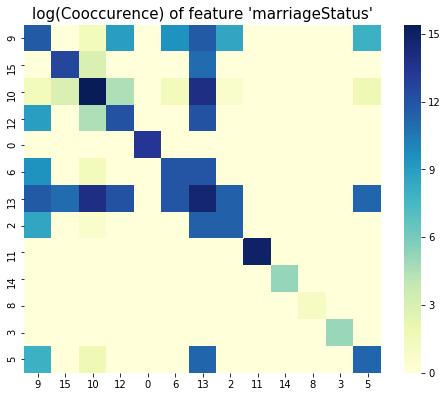

In [8]:
feat_name = 'marriageStatus'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    plot_cooc(cooc_matrix, val_index, 
              figsize=(8, 6.4), 
              titlesize=15,
              savepath=figpath(feat_name))

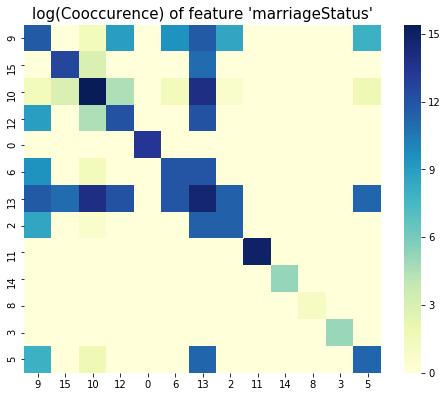

In [9]:
feat_name = 'marriageStatus'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    plot_cooc(cooc_matrix, val_index, 
              figsize=(8, 6.4), 
              titlesize=15, 
              savepath=figpath(feat_name))

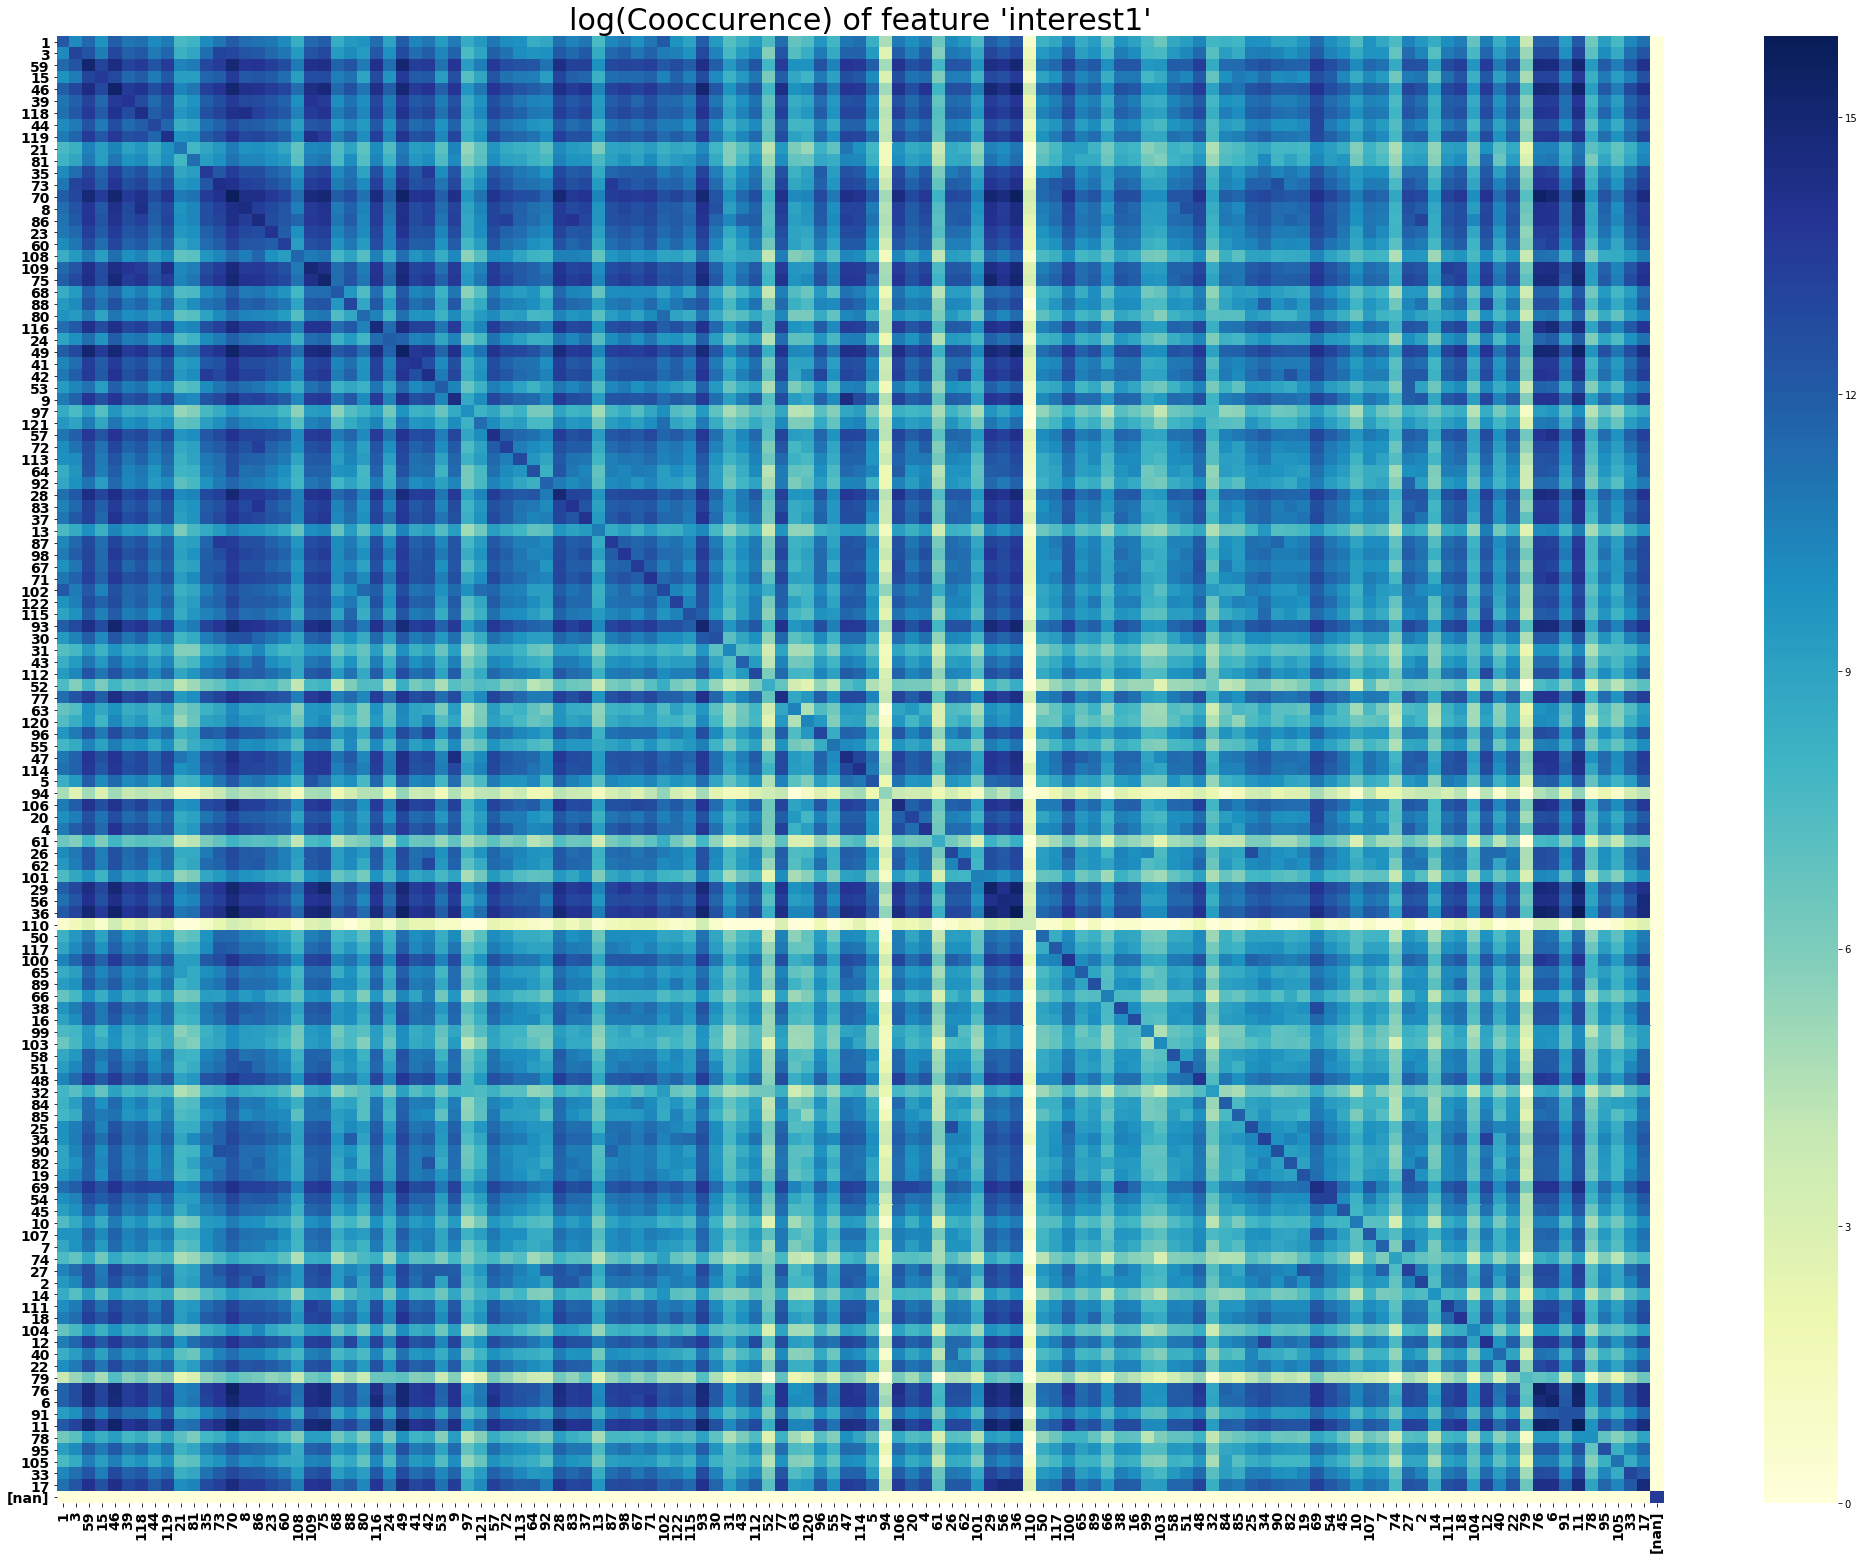

In [10]:
feat_name = 'interest1'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    plot_cooc(cooc_matrix, val_index, 
              figsize=(36, 27), 
              titlesize=30,
              ticksize=14, 
              tickweight=700, 
              savepath=figpath(feat_name))

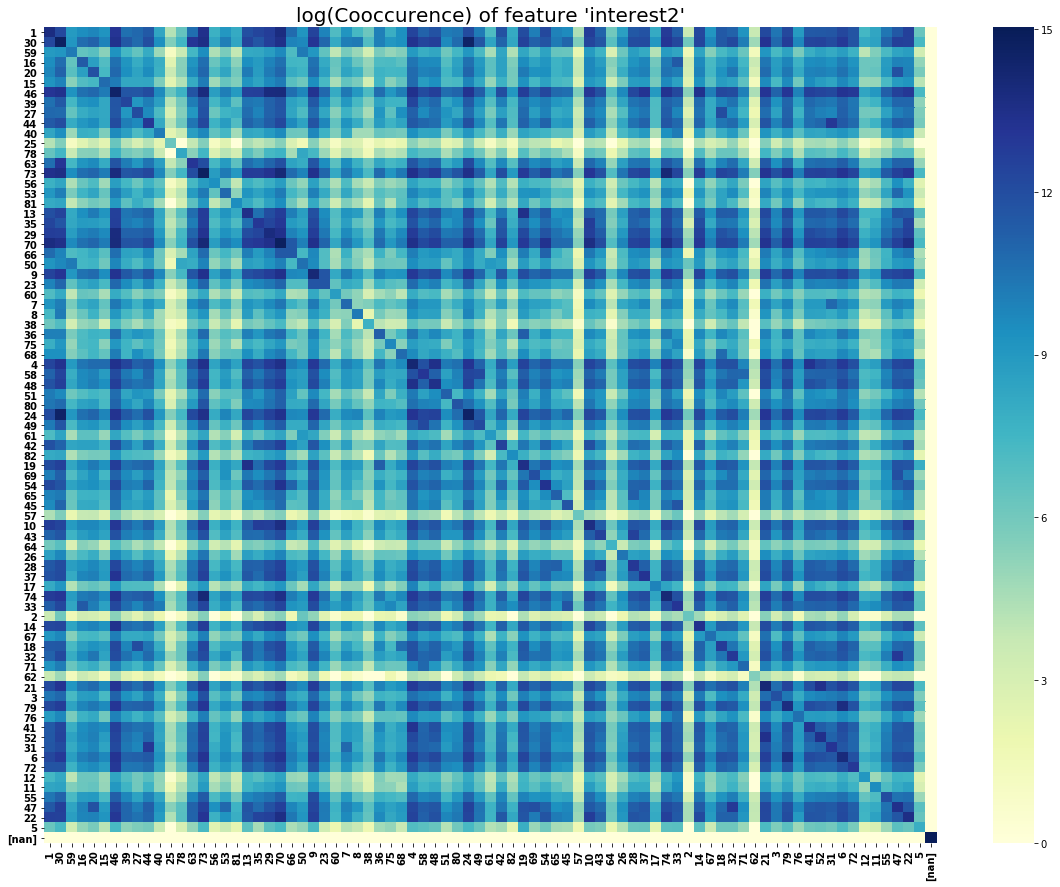

In [11]:
feat_name = 'interest2'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    plot_cooc(cooc_matrix, val_index, 
              tickweight=700, 
              savepath=figpath(feat_name))

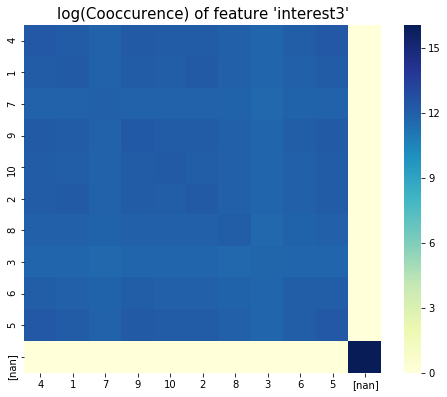

In [12]:
feat_name = 'interest3'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    plot_cooc(cooc_matrix, val_index, 
              figsize=(8, 6.4), 
              titlesize=15,
              savepath=figpath(feat_name))

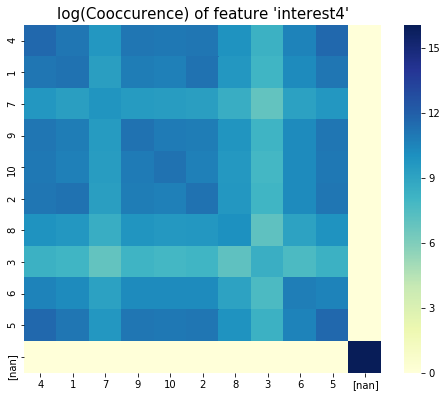

In [13]:
feat_name = 'interest4'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    plot_cooc(cooc_matrix, val_index, 
              figsize=(8, 6.4), 
              titlesize=15,
              savepath=figpath(feat_name))

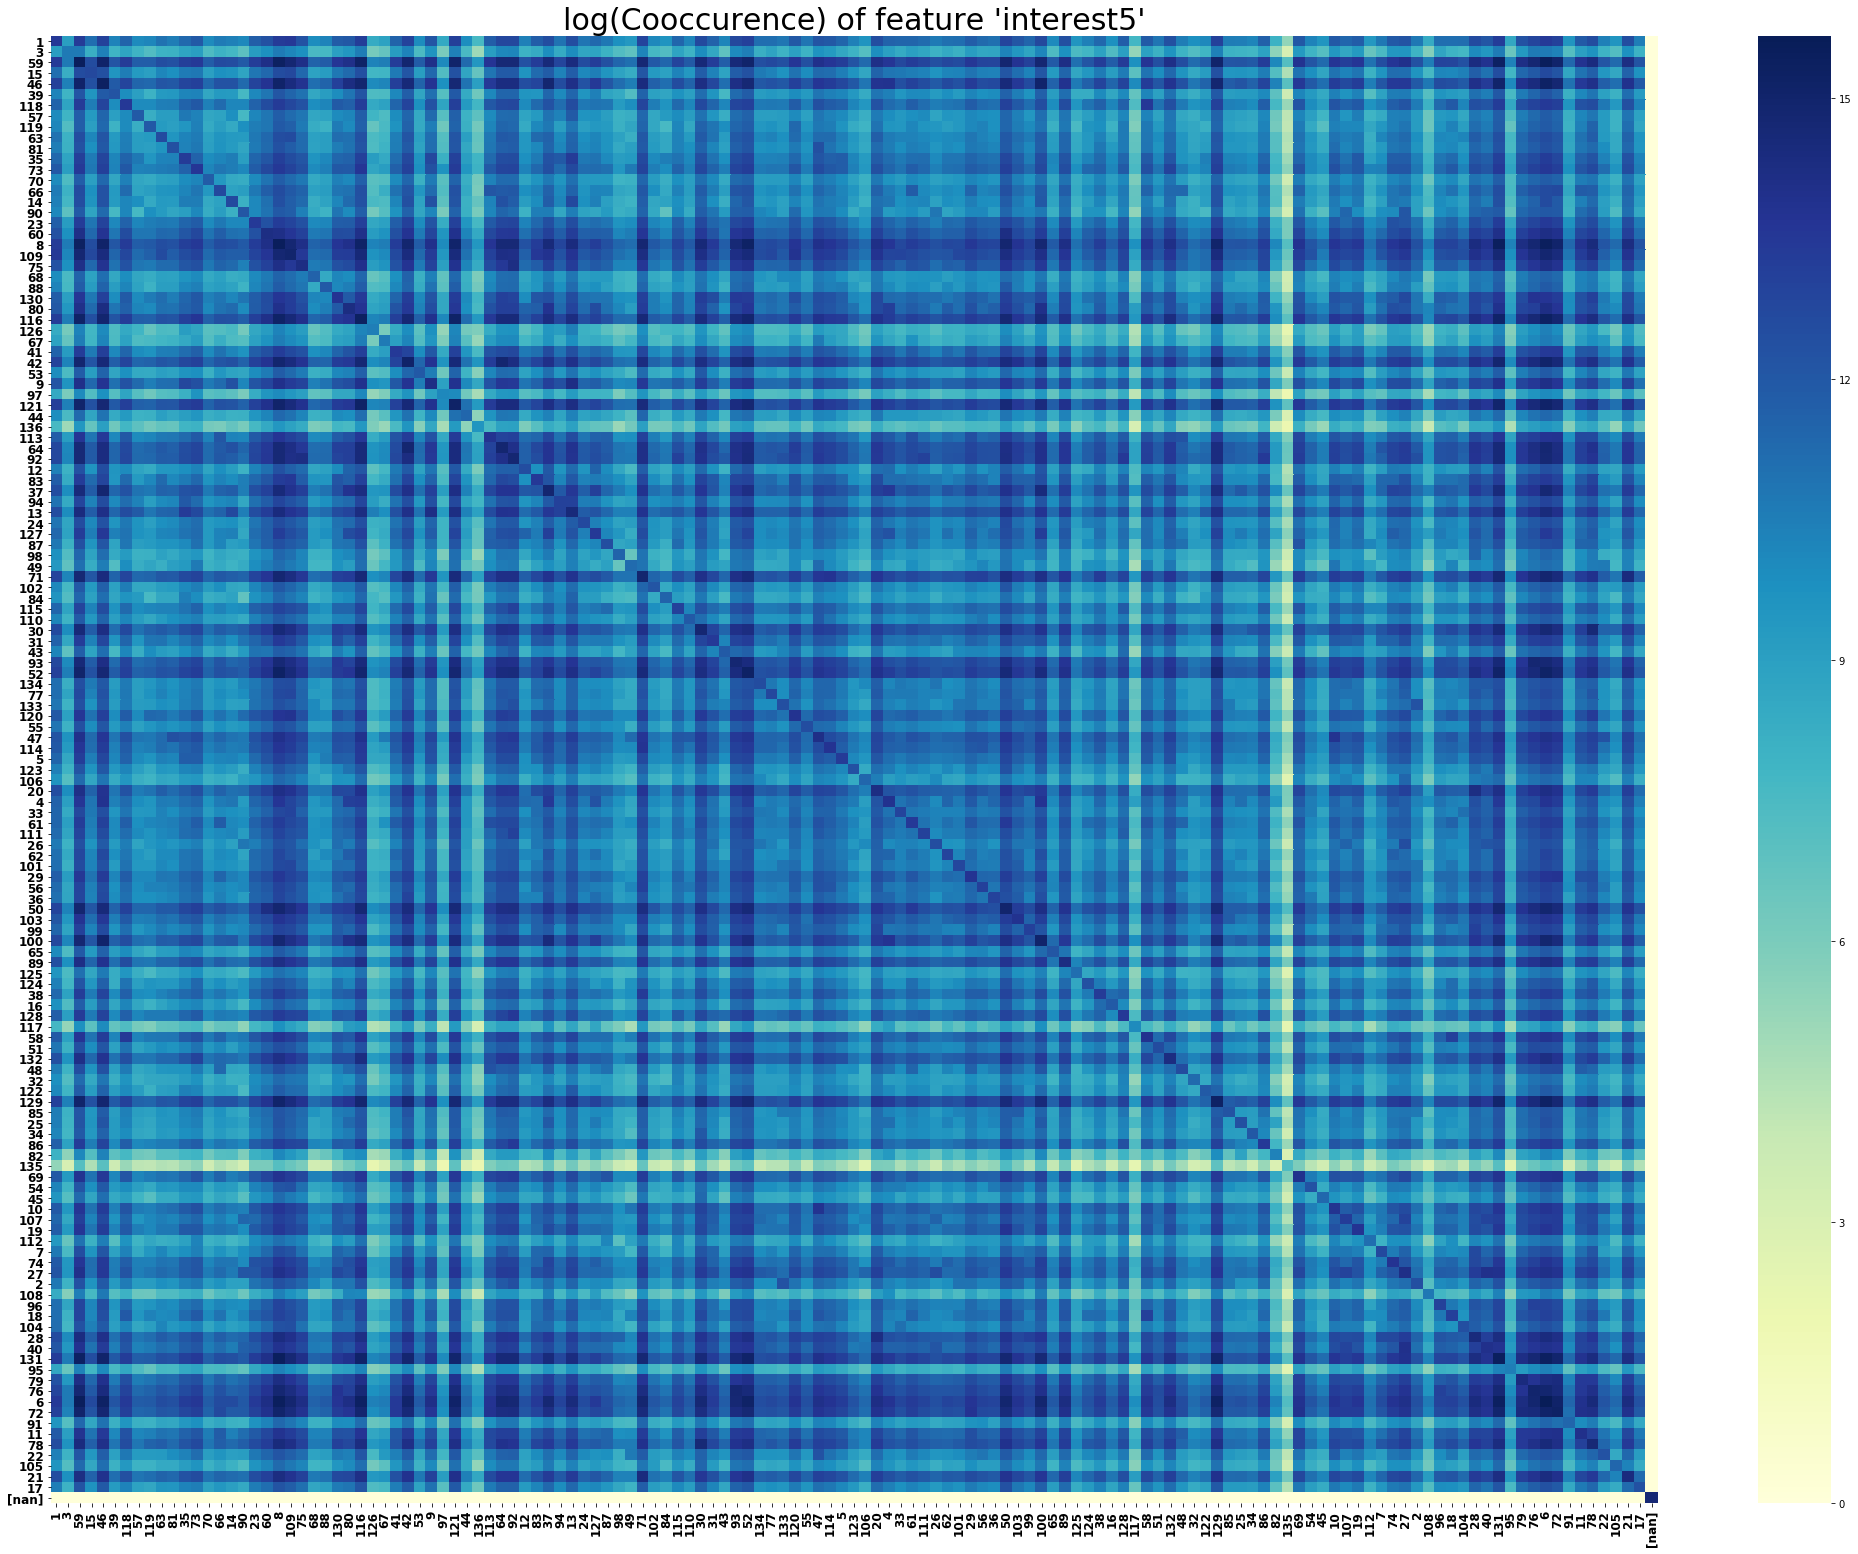

In [14]:
feat_name = 'interest5'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    plot_cooc(cooc_matrix, val_index, 
              figsize=(36, 27), 
              titlesize=30,
              ticksize=12, 
              tickweight=700, 
              savepath=figpath(feat_name))

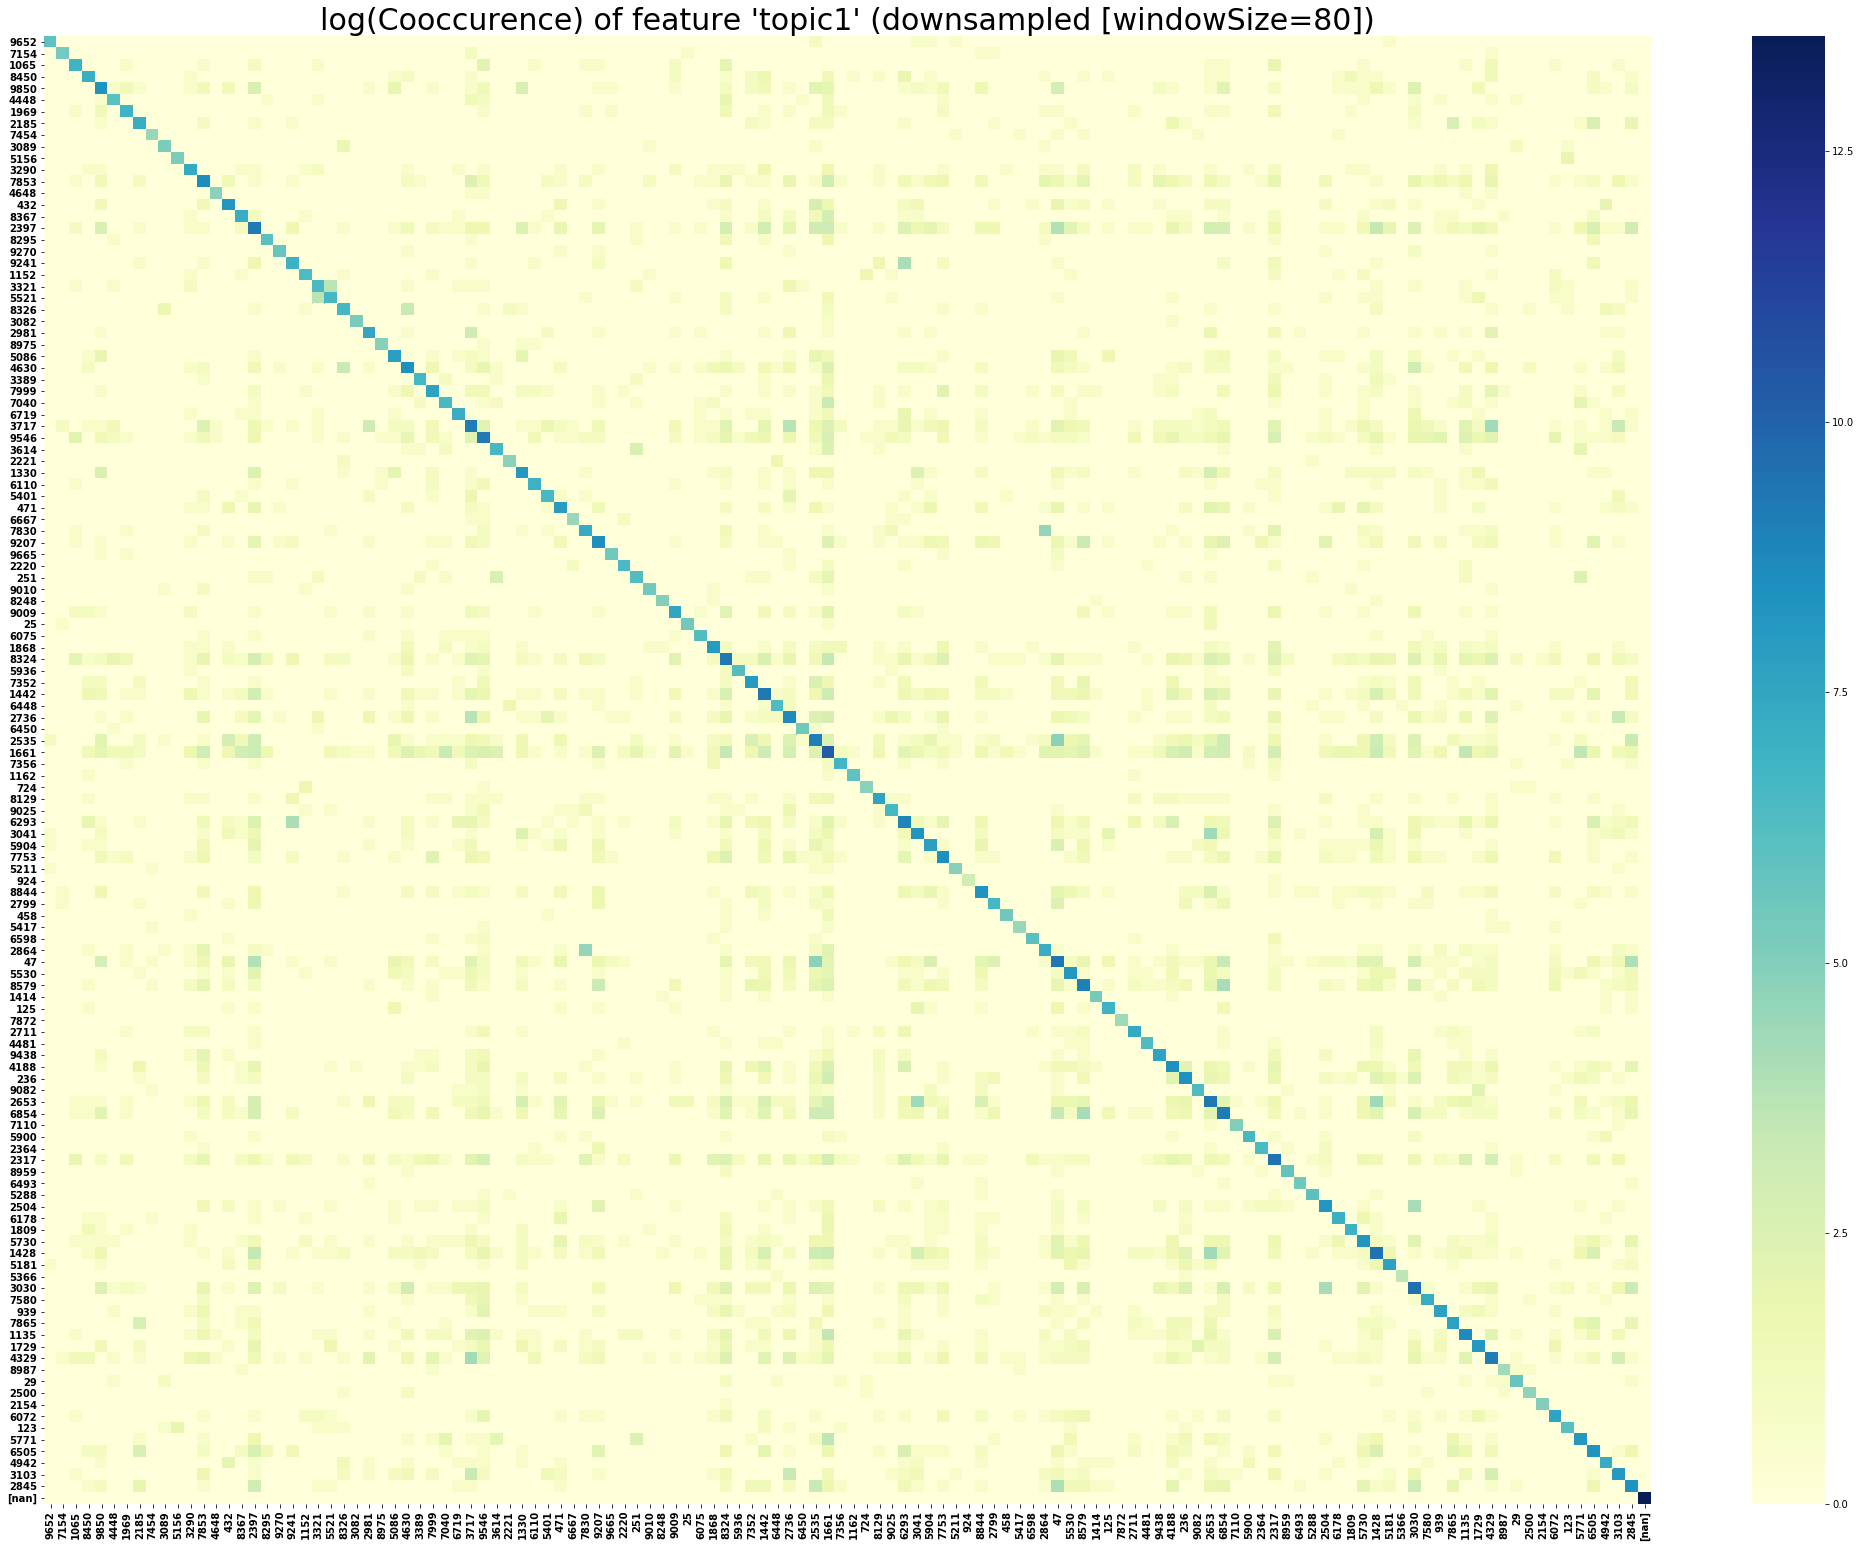

In [15]:
feat_name = 'topic1'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    window = 80
    plot_cooc_downsample(cooc_matrix, val_index, 
                         window=window, 
                         figsize=(36, 27), 
                         titlesize=30, 
                         ticksize=10, 
                         tickweight=700,
                         savepath=figpath(feat_name))

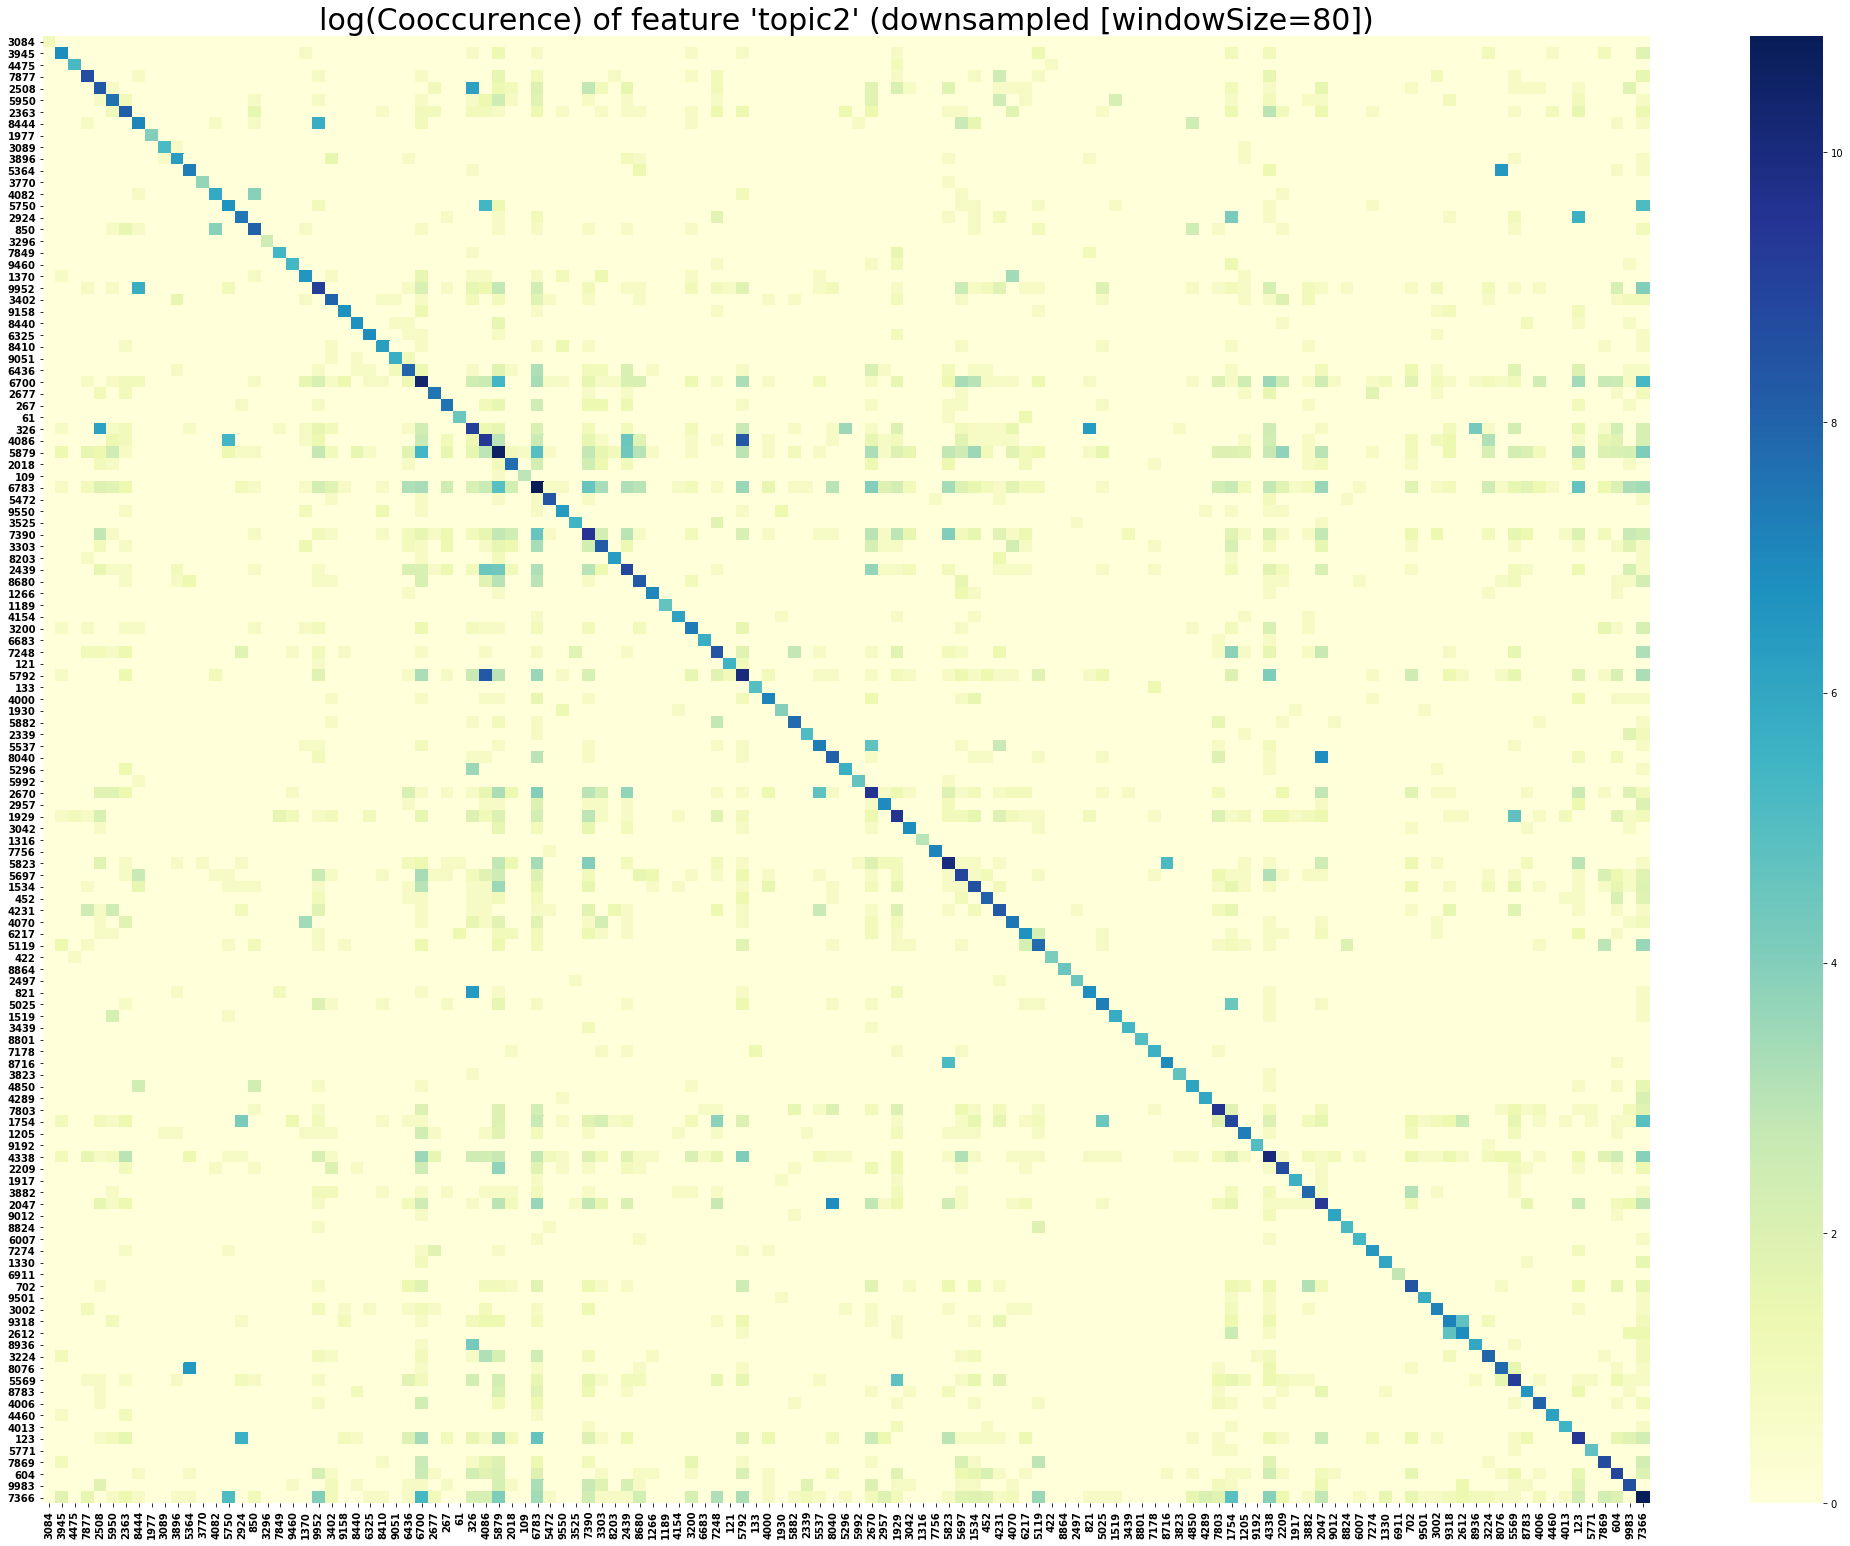

In [16]:
feat_name = 'topic2'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    window = 80
    plot_cooc_downsample(cooc_matrix, val_index, 
                         window=window, 
                         figsize=(36, 27), 
                         titlesize=30, 
                         ticksize=10, 
                         tickweight=700, 
                         savepath=figpath(feat_name))

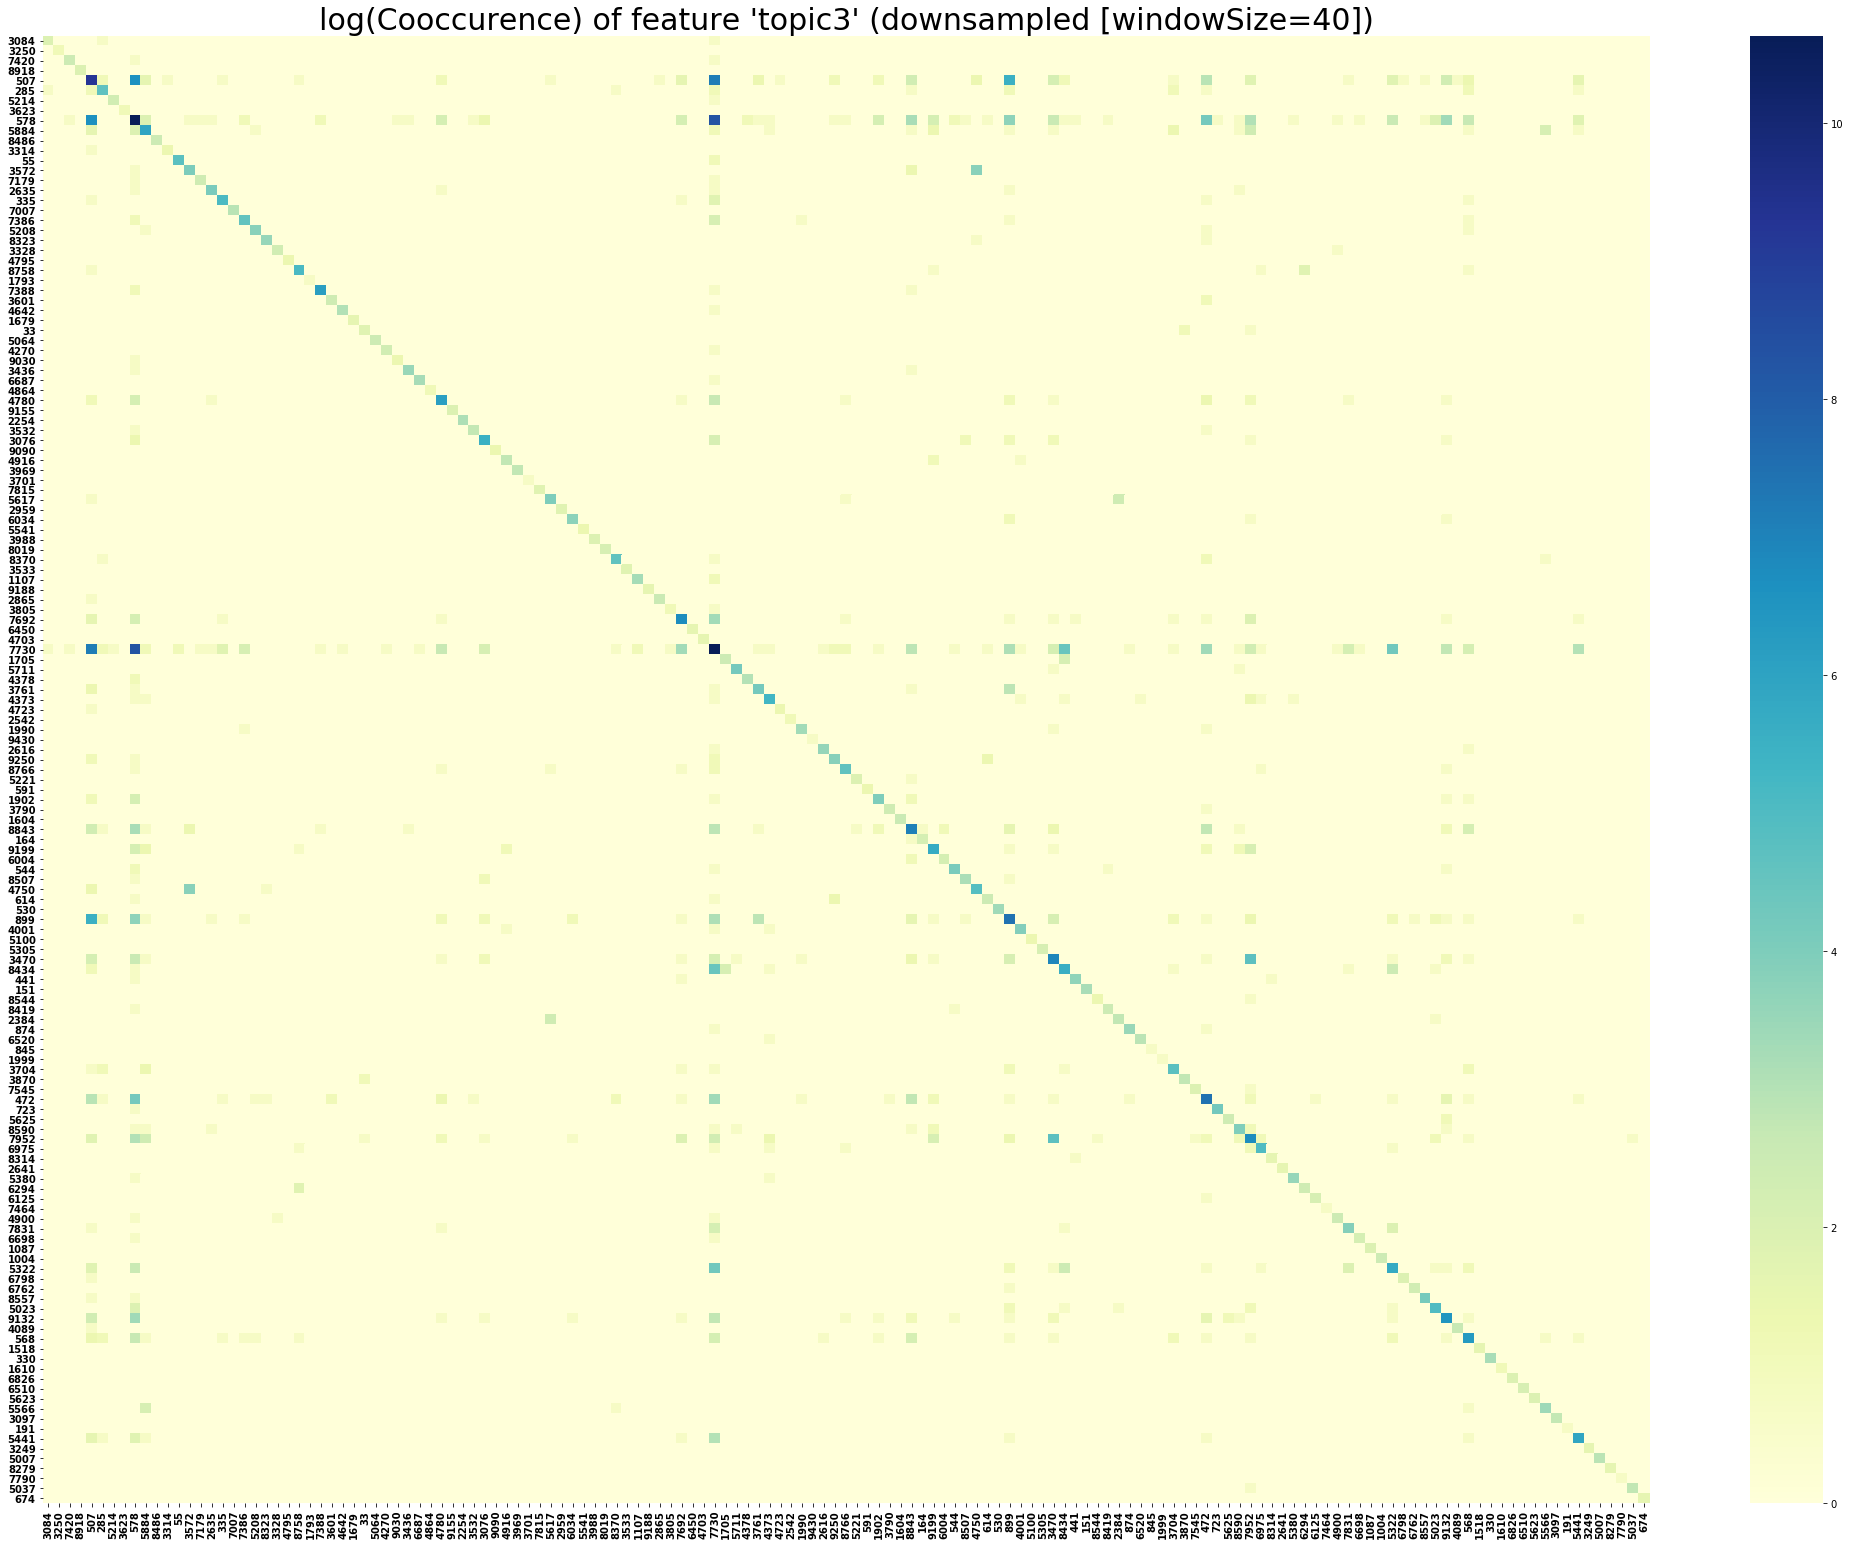

In [17]:
feat_name = 'topic3'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    window = 40
    plot_cooc_downsample(cooc_matrix, val_index, 
                         window=window, 
                         figsize=(36, 27), 
                         titlesize=30, 
                         ticksize=10, 
                         tickweight=700, 
                         savepath=figpath(feat_name))

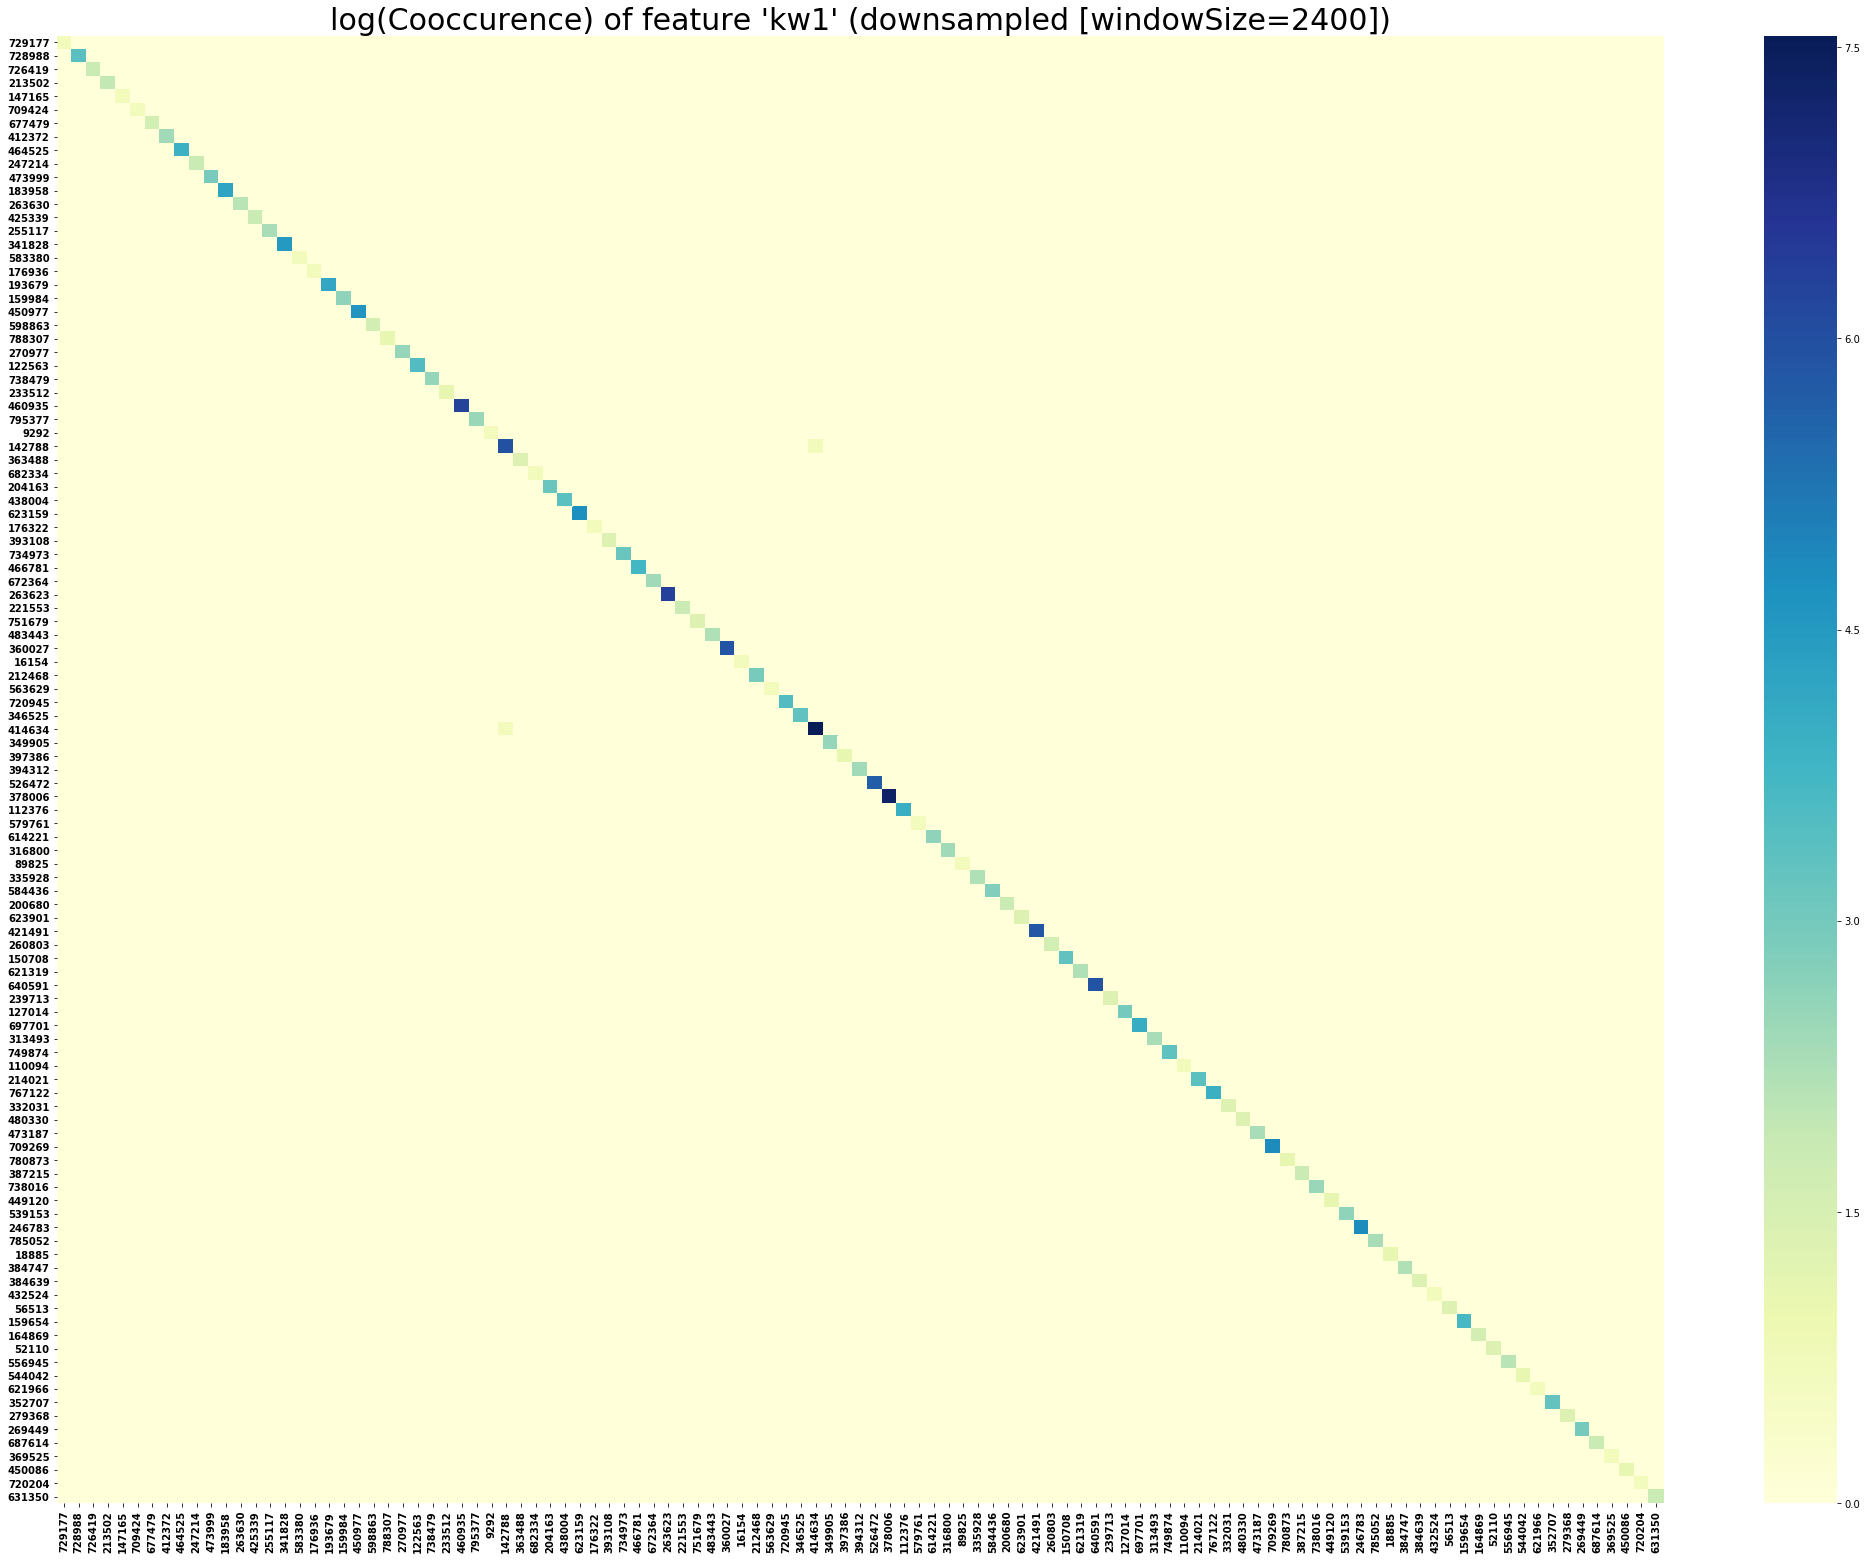

In [18]:
feat_name = 'kw1'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    window = 2400
    plot_cooc_downsample(cooc_matrix, val_index, 
                         window=window, 
                         figsize=(36, 27), 
                         titlesize=30, 
                         ticksize=10, 
                         tickweight=700, 
                         savepath=figpath(feat_name))

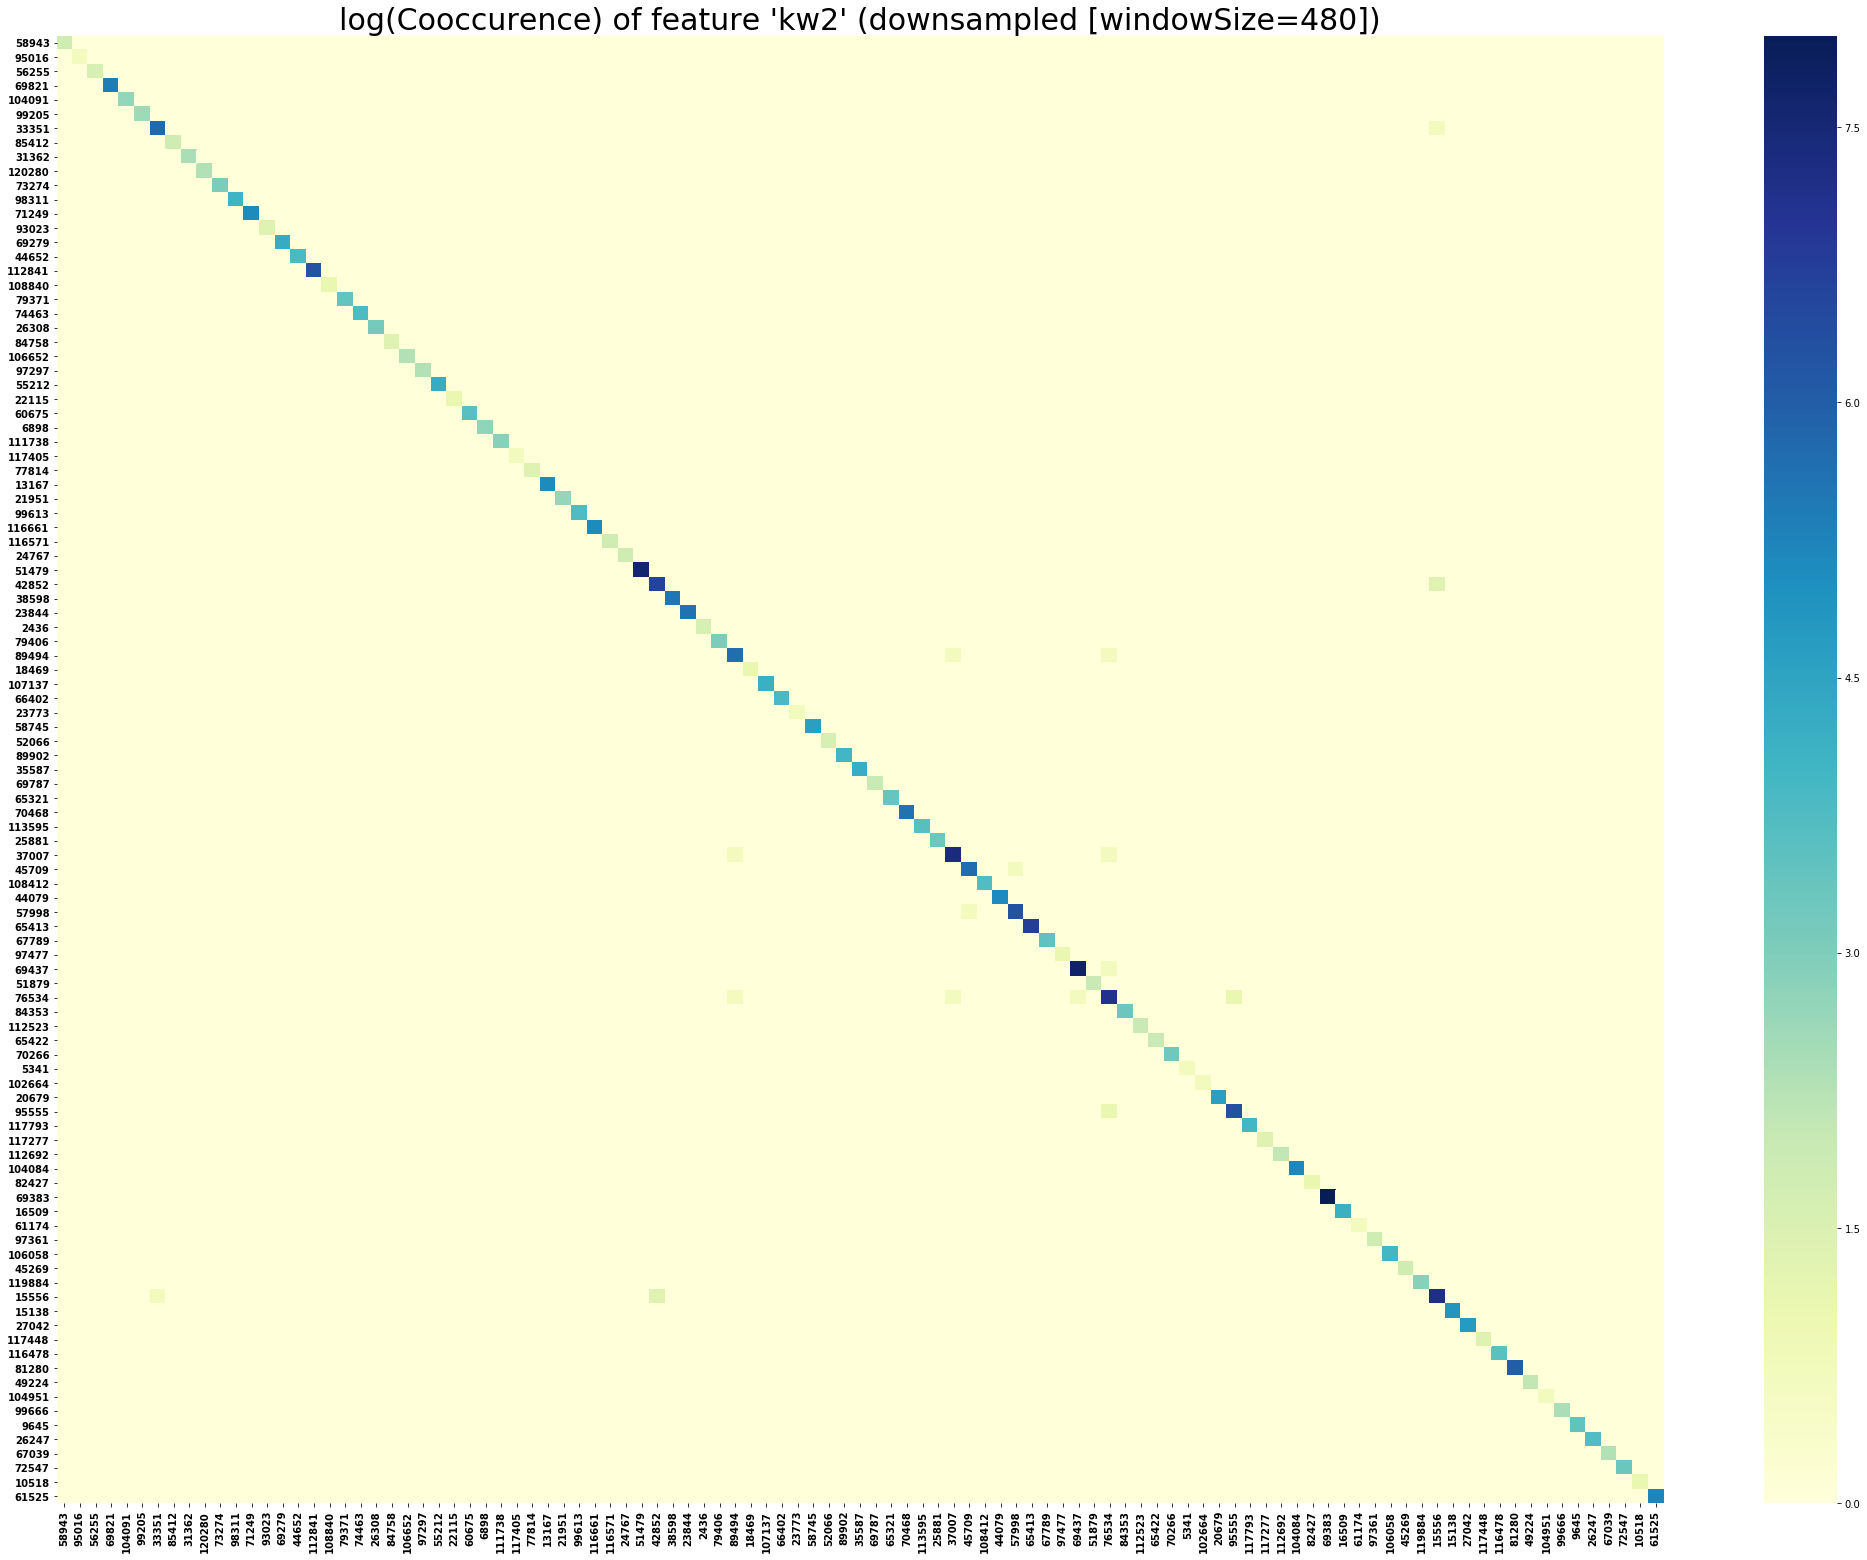

In [19]:
feat_name = 'kw2'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    window = 480
    val_index, cooc_matrix = load_cooc(feat_name)
    plot_cooc_downsample(cooc_matrix, val_index,
                         window=window, 
                         figsize=(36, 27), 
                         titlesize=30, 
                         ticksize=10, 
                         tickweight=700, 
                         savepath=figpath(feat_name))

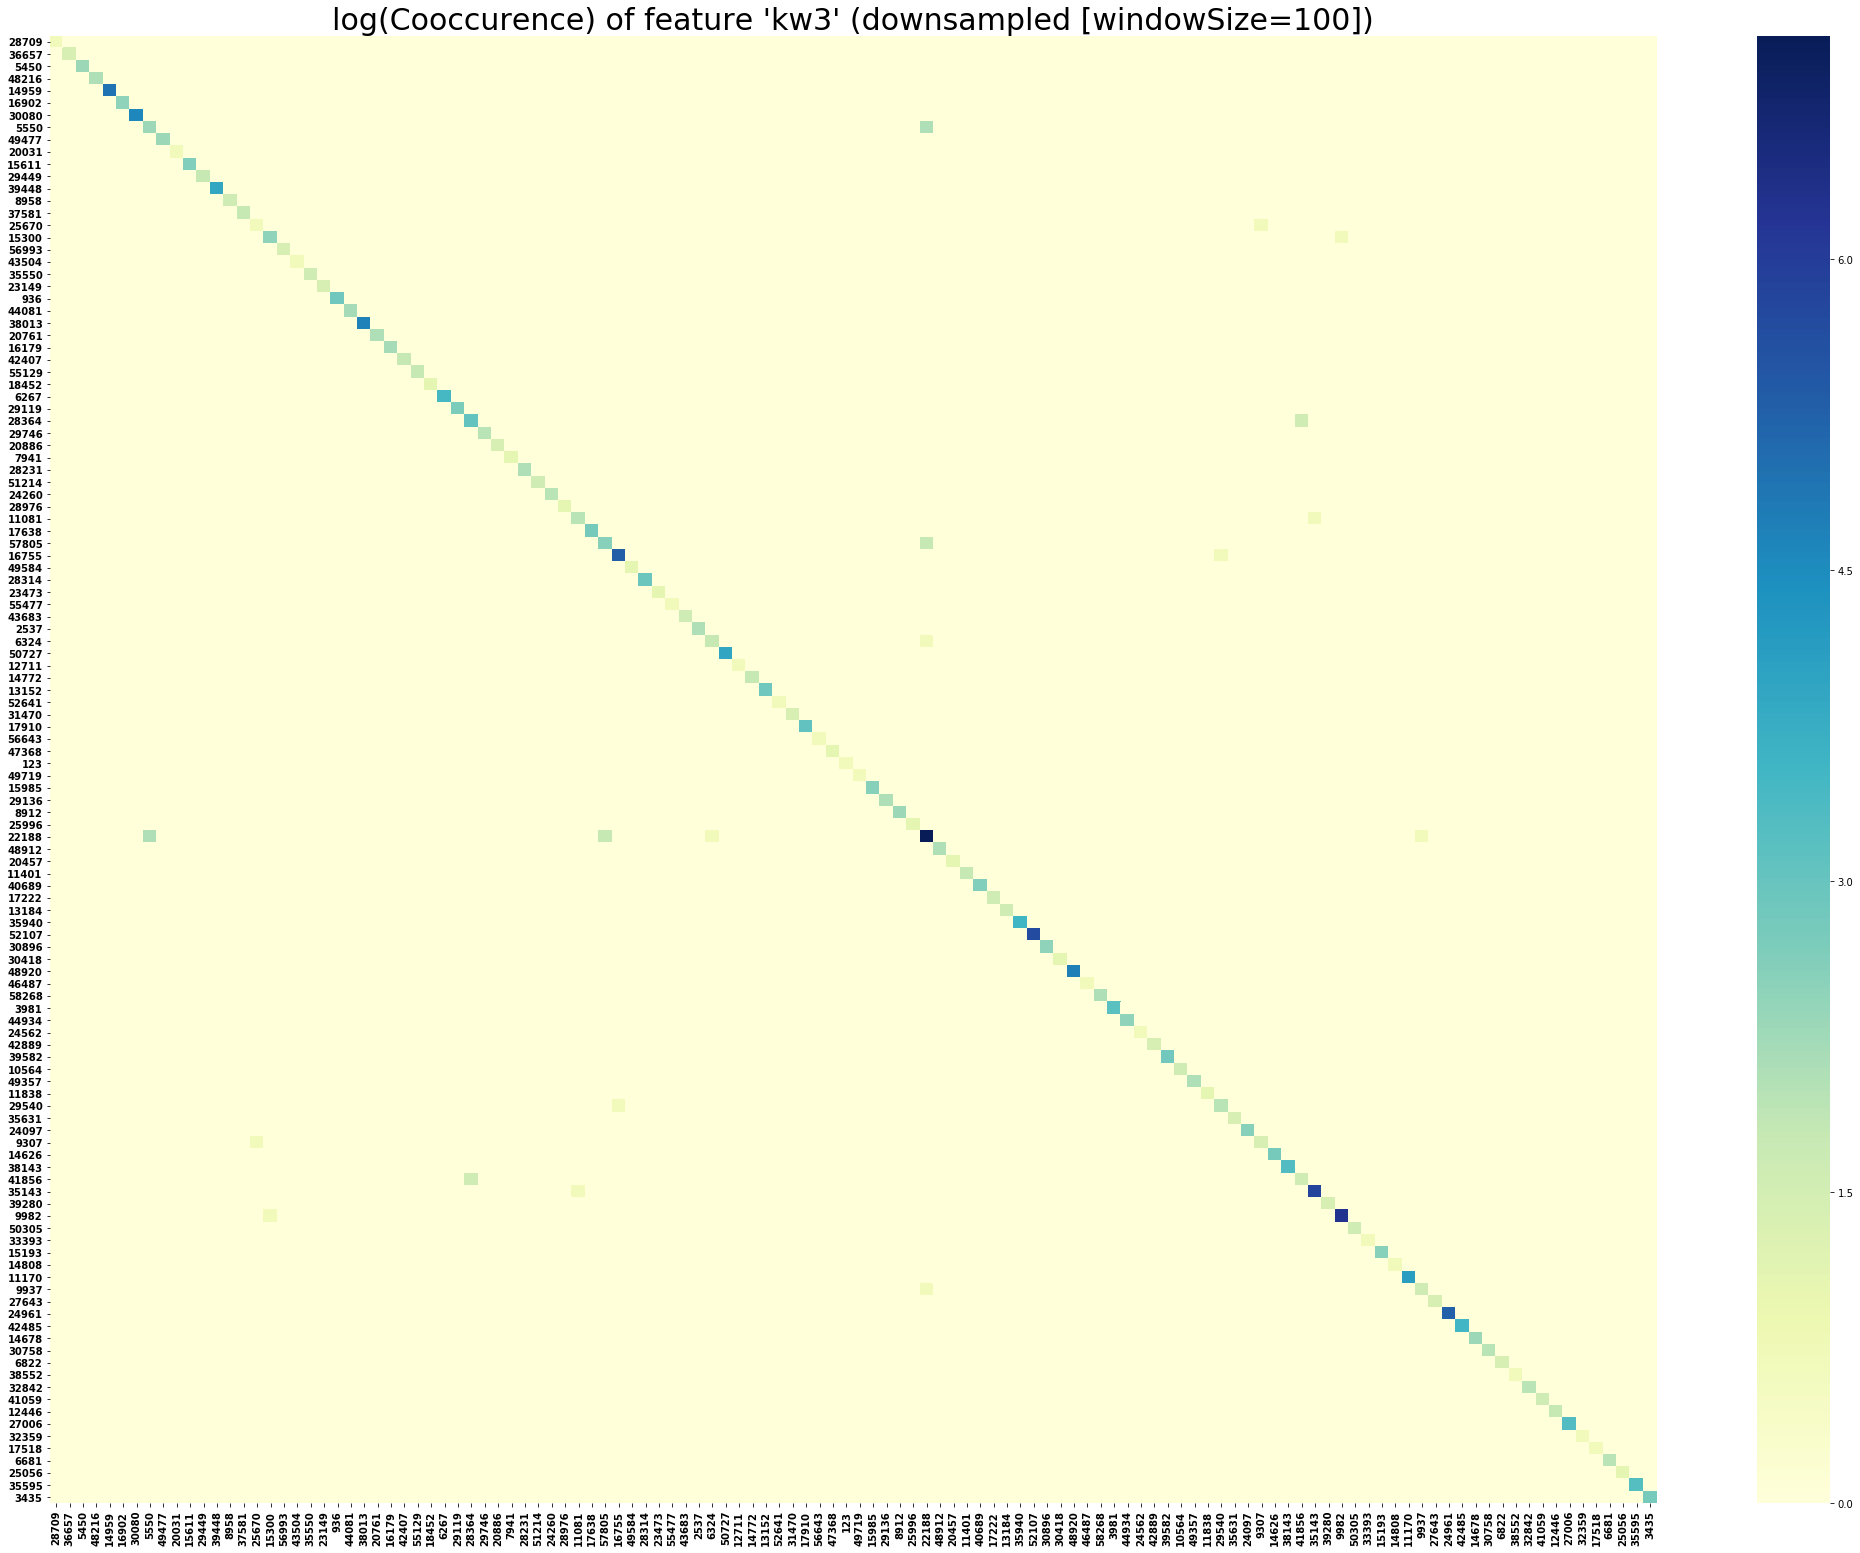

In [20]:
feat_name = 'kw3'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    window = 100
    val_index, cooc_matrix = load_cooc(feat_name)
    plot_cooc_downsample(cooc_matrix, val_index,
                         window=window, 
                         figsize=(36, 27),
                         titlesize=30, 
                         ticksize=10, 
                         tickweight=700, 
                         savepath=figpath(feat_name))

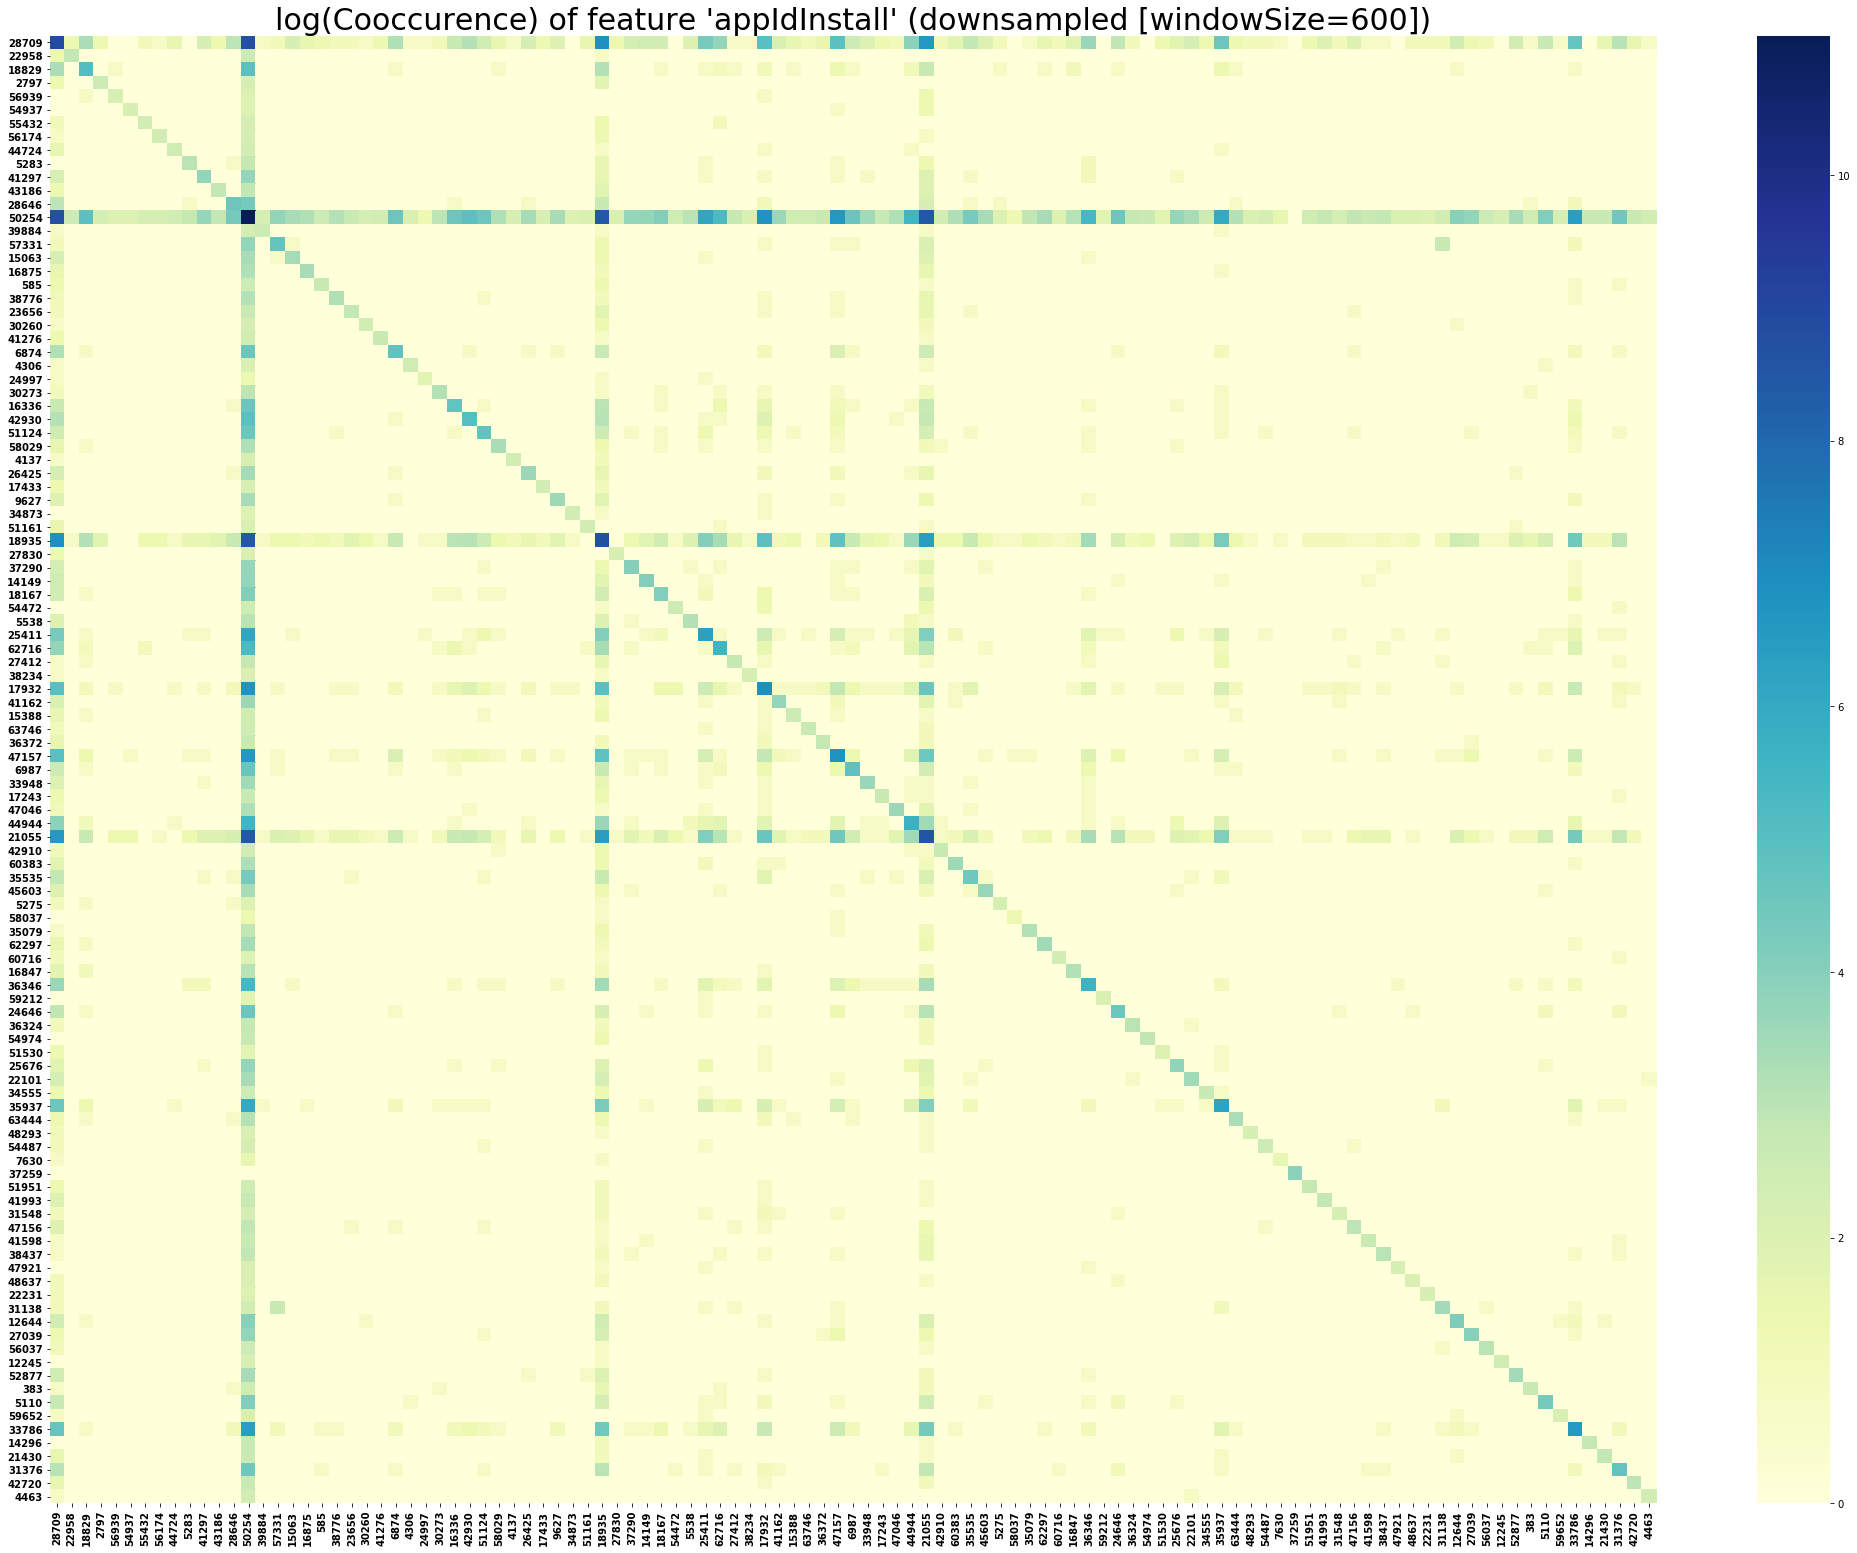

In [21]:
feat_name = 'appIdInstall'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    window = 600
    plot_cooc_downsample(cooc_matrix, val_index, 
                         window=window, 
                         figsize=(36, 27), 
                         titlesize=30, 
                         ticksize=10, 
                         tickweight=700, 
                         savepath=figpath(feat_name))

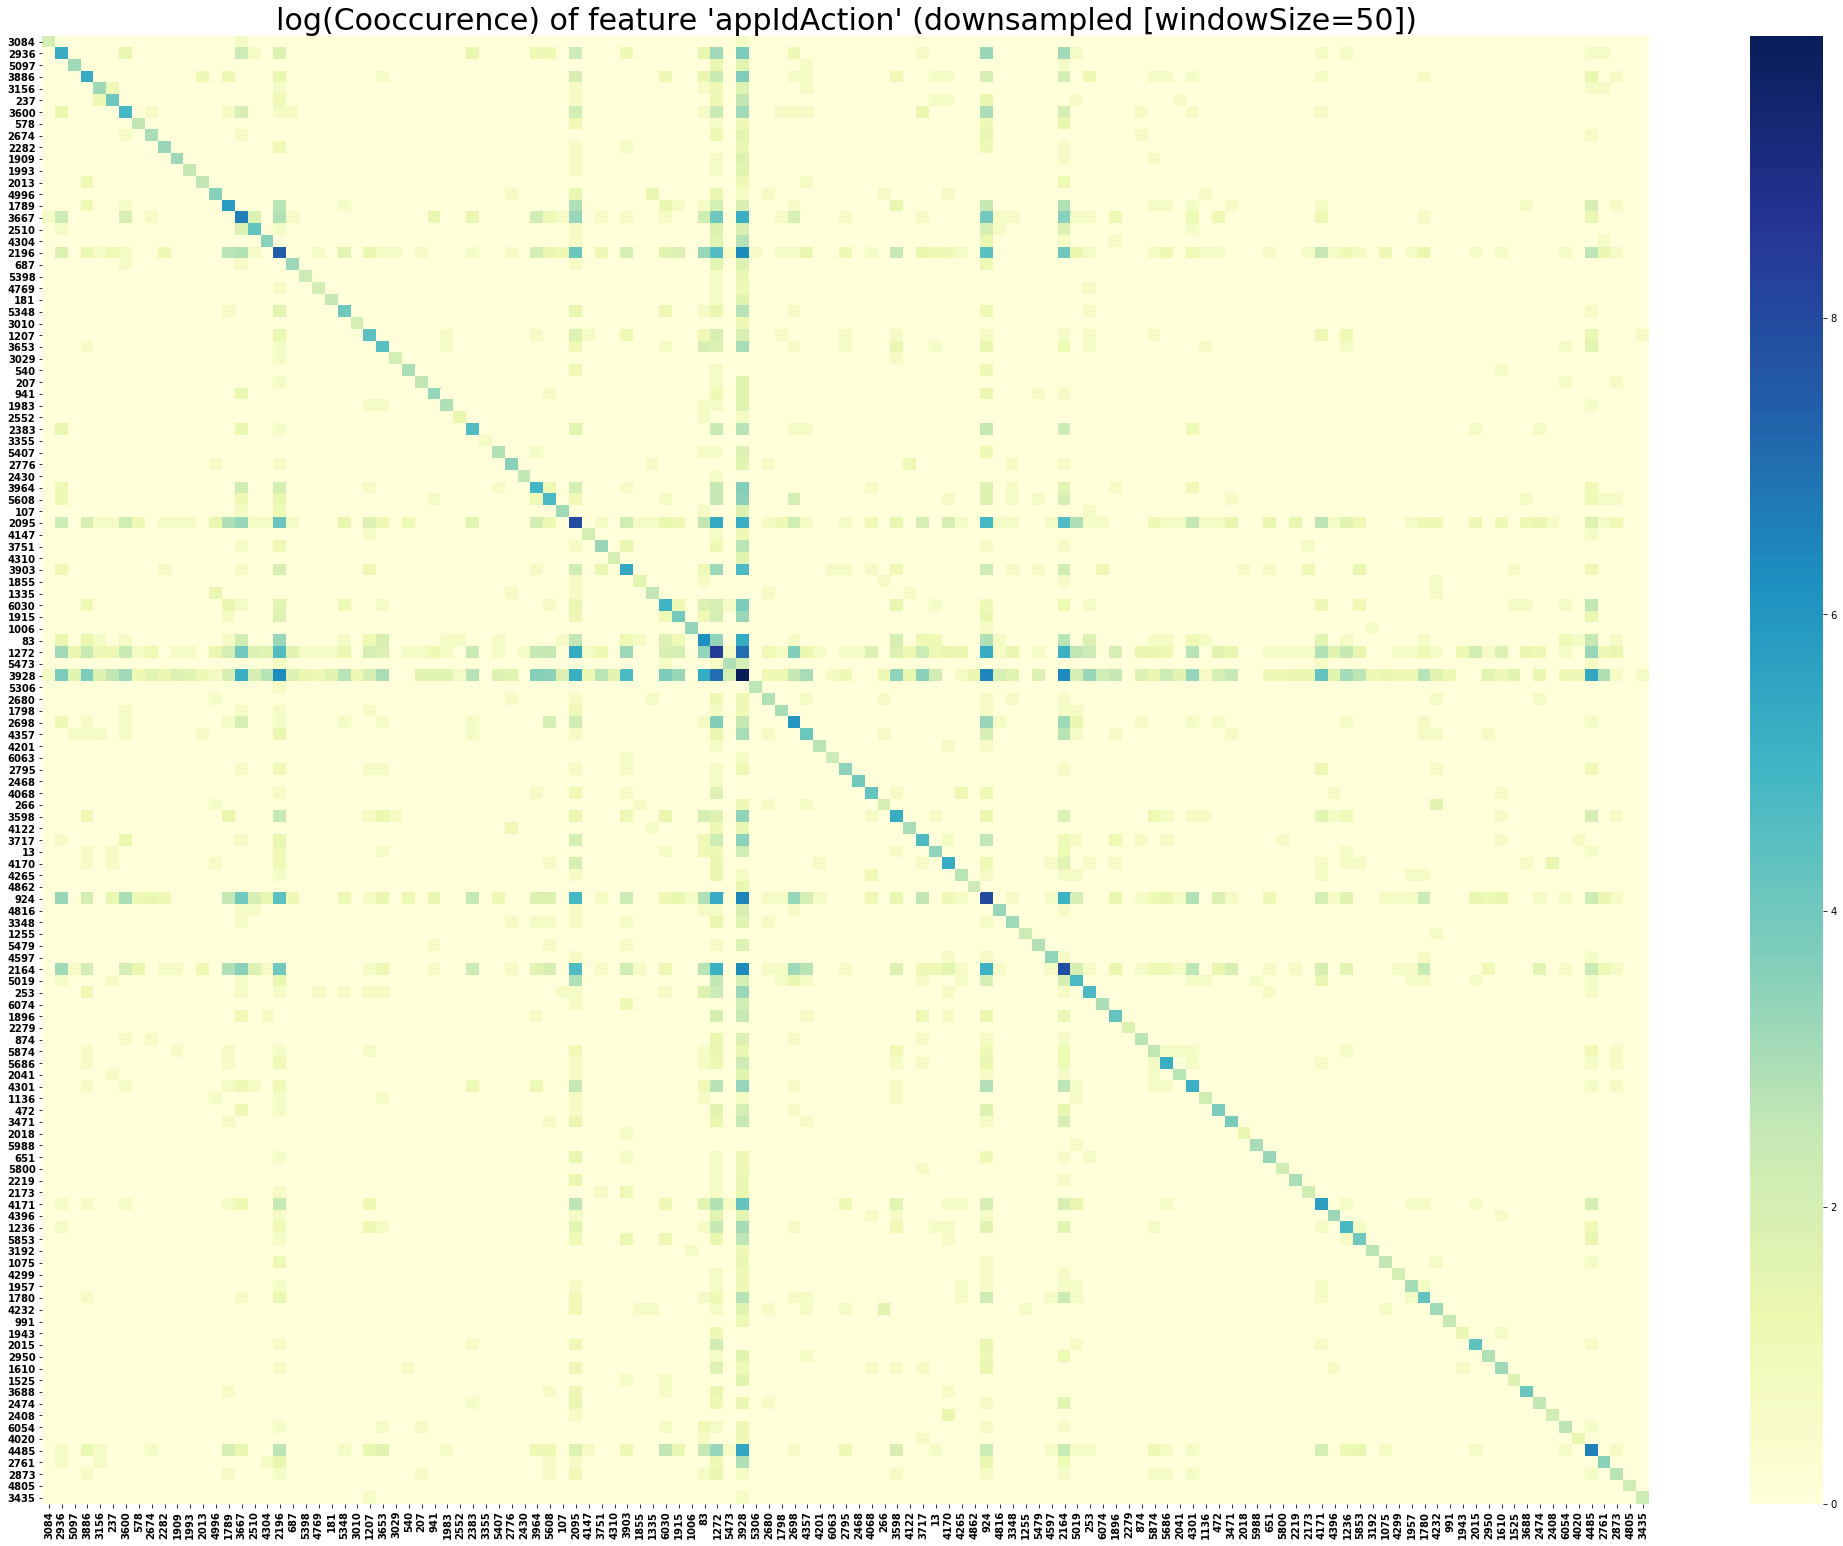

In [22]:
feat_name = 'appIdAction'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    window = 50
    plot_cooc_downsample(cooc_matrix, val_index, 
                         window=window, 
                         figsize=(36, 27), 
                         titlesize=30, 
                         ticksize=10, 
                         tickweight=700, 
                         savepath=figpath(feat_name))

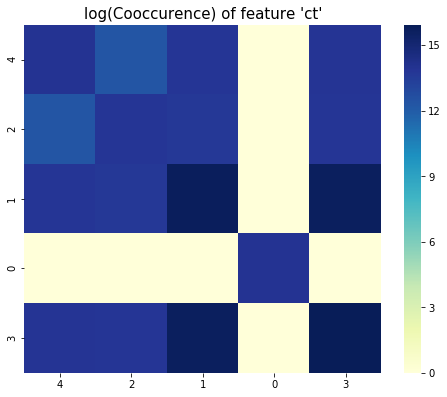

In [23]:
feat_name = 'ct'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    plot_cooc(cooc_matrix, val_index, 
              figsize=(8, 6.4), 
              titlesize=15,
              savepath=figpath(feat_name))

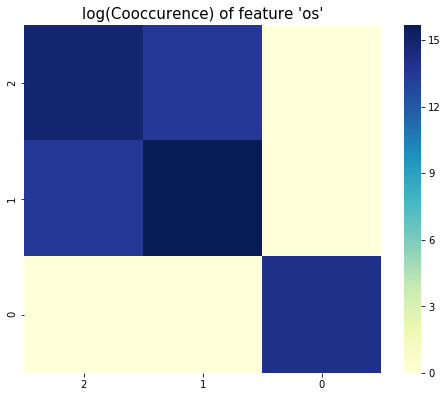

In [24]:
feat_name = 'os'
with prepare_cooc(feat_name) as (val_index, cooc_matrix):
    plot_cooc(cooc_matrix, val_index, 
              figsize=(8, 6.4), 
              titlesize=15,
              savepath=figpath(feat_name))